In [7]:
pip install numpy --upgrade

In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

AttributeError: module 'numpy' has no attribute 'typeDict'

In [8]:
df1 = pd.read_csv("C:\\Users\\HP\\Desktop\\iitdelhifsm\\Dataset\\cicids2017\\MachineLearningCSV\\MachineLearningCVE\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

In [208]:
df1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [209]:
df2 = pd.read_csv("C:\\Users\\HP\\Desktop\\iitdelhifsm\\Dataset\\cicids2017\\MachineLearningCSV\\MachineLearningCVE\\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3 = pd.read_csv("C:\\Users\\HP\\Desktop\\iitdelhifsm\\Dataset\\cicids2017\\MachineLearningCSV\\MachineLearningCVE\\Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4 = pd.read_csv("C:\\Users\\HP\\Desktop\\iitdelhifsm\\Dataset\\cicids2017\\MachineLearningCSV\\MachineLearningCVE\\Monday-WorkingHours.pcap_ISCX.csv")
df5 = pd.read_csv("C:\\Users\\HP\\Desktop\\iitdelhifsm\\Dataset\\cicids2017\\MachineLearningCSV\\MachineLearningCVE\\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6 = pd.read_csv("C:\\Users\\HP\\Desktop\\iitdelhifsm\\Dataset\\cicids2017\\MachineLearningCSV\\MachineLearningCVE\\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7 = pd.read_csv("C:\\Users\\HP\\Desktop\\iitdelhifsm\\Dataset\\cicids2017\\MachineLearningCSV\\MachineLearningCVE\\Tuesday-WorkingHours.pcap_ISCX.csv")
df8 = pd.read_csv("C:\\Users\\HP\\Desktop\\iitdelhifsm\\Dataset\\cicids2017\\MachineLearningCSV\\MachineLearningCVE\\Wednesday-workingHours.pcap_ISCX.csv")

In [210]:
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

In [211]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [212]:
list(df.columns)

[' Destination Port',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' P

In [213]:
df.to_csv('CICIDS.csv')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' Destination Port', ylabel='Density'>

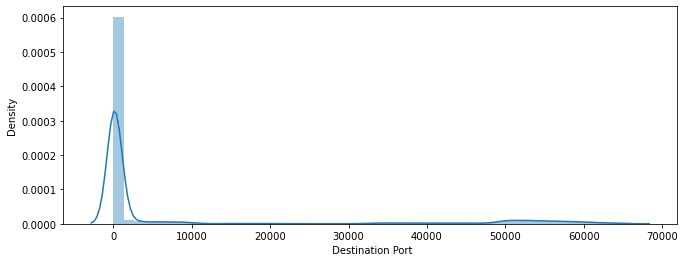

In [214]:
sns.distplot(a = df[' Destination Port']) 

In [215]:
fmap = {'BENIGN':'BENIGN','DoS Hulk':'DoS Hulk','PortScan':'PortScan','DDoS':'DDoS',
        'DoS GoldenEye':'DoS GoldenEye' , 'FTP-Patator':'FTP-Patator' ,'SSH-Patator':'SSH-Patator' ,'DoS slowloris':'DoS slowloris',
        'DoS Slowhttptest':'DoS Slowhttptest' , 'Bot':'Bot' ,'Web Attack � Brute Force':'Web Attack Brute Force' , 
        'Web Attack � XSS':'Web Attack XSS' , 'Infiltration':'Infiltration' , 'Web Attack � Sql Injection':'Web Attack Sql Injection' , 'Heartbleed':'Heartbleed'}
df[' Label'] = df[' Label'].map(fmap)

In [216]:
label_counts = df[' Label'].value_counts()
label_counts

BENIGN                      2273097
DoS Hulk                     231073
PortScan                     158930
DDoS                         128027
DoS GoldenEye                 10293
FTP-Patator                    7938
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1966
Web Attack Brute Force         1507
Web Attack XSS                  652
Infiltration                     36
Web Attack Sql Injection         21
Heartbleed                       11
Name:  Label, dtype: int64

<AxesSubplot:>

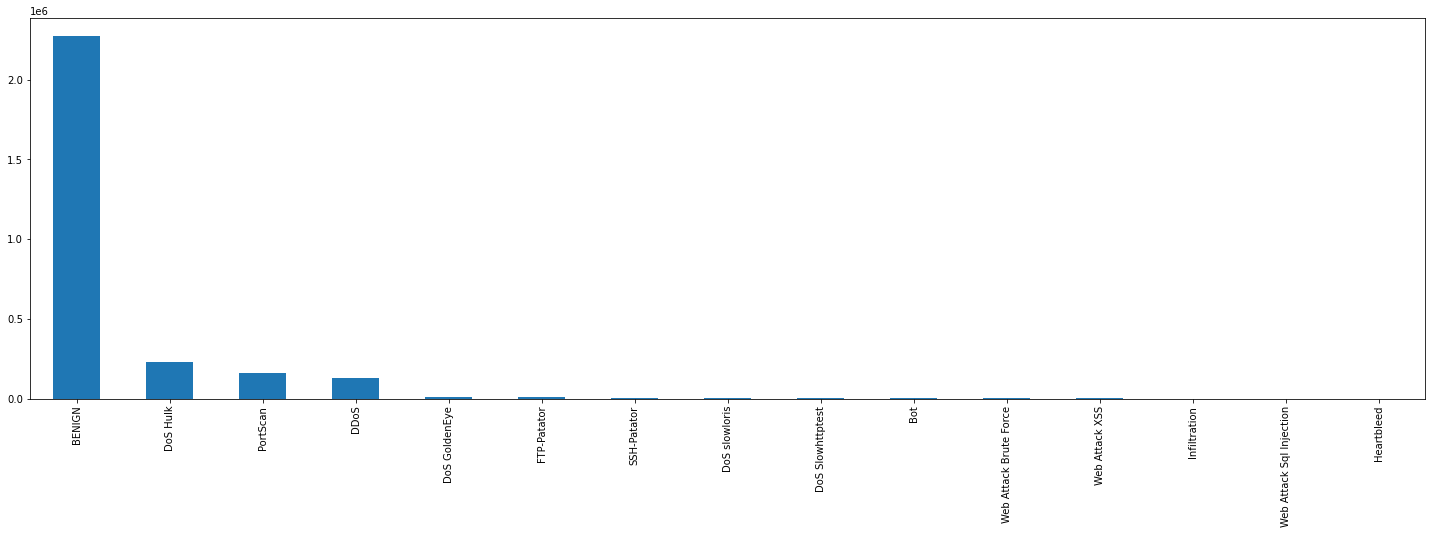

In [217]:
label_counts.plot.bar(figsize = (25,7))

In [218]:
for i in df.columns:
    df = df[df[i] != "Infinity"]
    df = df[df[i] != np.nan]
    df = df[df[i] != ",,"]
df[['Flow Bytes/s', ' Flow Packets/s']] = df[['Flow Bytes/s', ' Flow Packets/s']].apply(pd.to_numeric) 

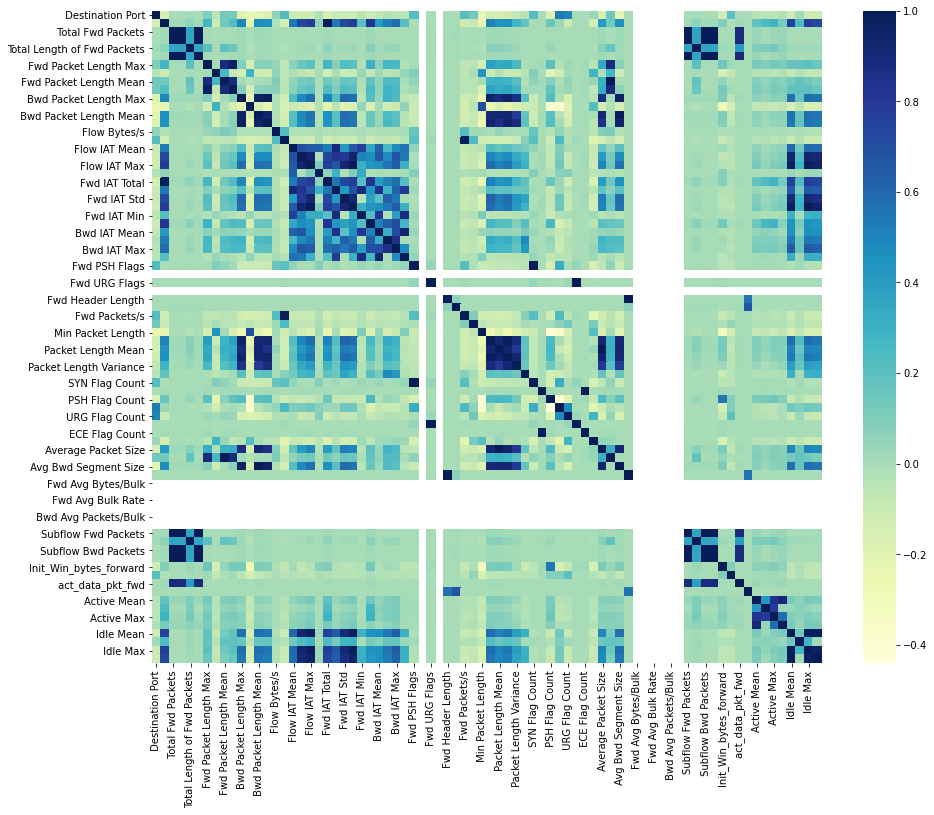

In [219]:
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr, cmap="YlGnBu")

plt.show()

In [220]:
df[' Fwd Avg Bulk Rate'].unique()
df.drop(' Fwd Avg Bulk Rate',axis = 1,inplace = True)

In [221]:
df[' Bwd Avg Bytes/Bulk'].unique()
df.drop(' Bwd Avg Bytes/Bulk',axis = 1,inplace = True)

In [222]:
df[' Bwd Avg Packets/Bulk'].unique()
df.drop(' Bwd Avg Packets/Bulk',axis = 1,inplace = True)

In [223]:
df.columns[(df == 0).all()]

Index([' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [224]:
df.drop(' Bwd PSH Flags',axis = 1,inplace = True)
df.drop(' Bwd URG Flags',axis = 1,inplace = True)
df.drop('Fwd Avg Bytes/Bulk',axis = 1,inplace = True)
df.drop(' Fwd Avg Packets/Bulk',axis = 1,inplace = True)
df.drop('Bwd Avg Bulk Rate',axis = 1,inplace = True)

In [225]:
df.shape

(2830743, 71)

In [226]:
l = list(df.isnull().sum())
print(l)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1358, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [227]:
list(df.columns)

[' Destination Port',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Fwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 '

In [228]:
df['Fwd IAT Total']. corr(df[' Total Fwd Packets'])

0.020528449115409977

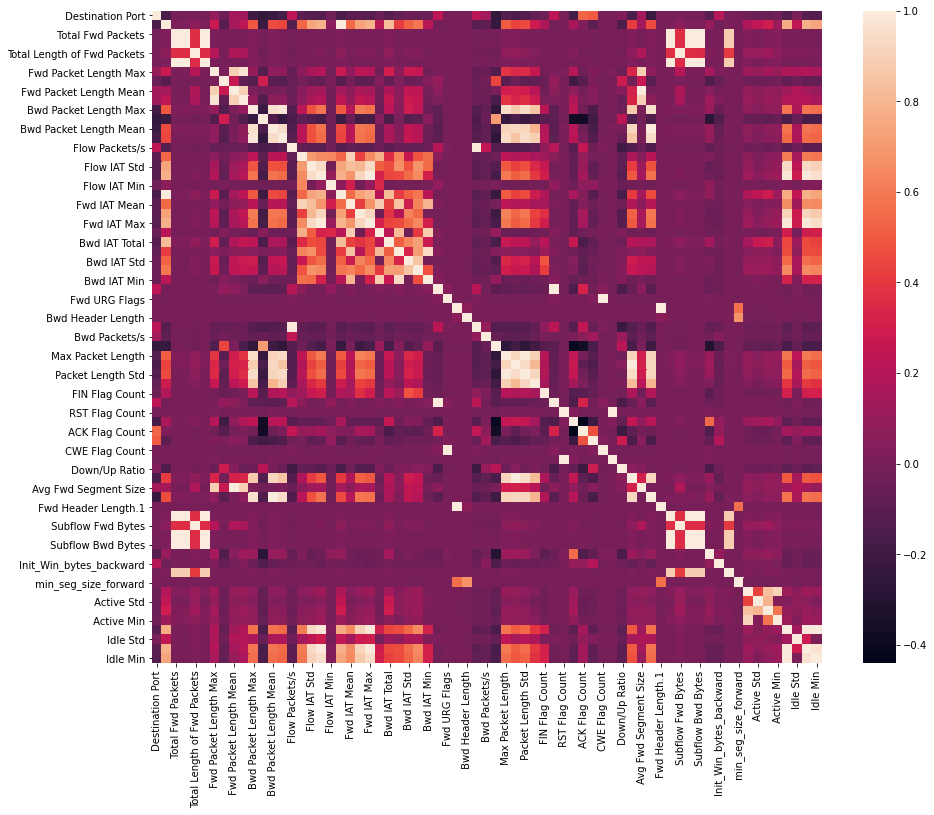

In [229]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [230]:
df[' Max Packet Length'].corr(df[' Packet Length Std'])

0.9844128255673544

In [231]:
df.drop(' Max Packet Length',axis = 1,inplace = True)

In [232]:
df.shape

(2830743, 69)

In [233]:
a = df.corr()

In [234]:
a.head(60)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.151680,-0.004236,-0.003947,0.011145,-0.003082,0.097926,-0.045388,0.140220,0.128861,...,-0.003226,0.000897,-0.035562,-0.043717,-0.051859,-0.023194,-0.112585,0.010399,-0.108185,-0.114614
Flow Duration,-0.151680,1.000000,0.020857,0.019670,0.065456,0.016186,0.273308,-0.105230,0.143689,0.234437,...,0.015942,-0.001357,0.189299,0.241060,0.294034,0.121171,0.768034,0.243154,0.779527,0.738328
Total Fwd Packets,-0.004236,0.020857,1.000000,0.999070,0.365508,0.996993,0.009358,-0.002989,0.000032,0.001403,...,0.887387,-0.000184,0.039937,0.008329,0.030459,0.041283,0.001820,0.000809,0.001906,0.001670
Total Backward Packets,-0.003947,0.019670,0.999070,1.000000,0.359451,0.994429,0.009039,-0.002600,-0.000333,0.001026,...,0.882566,0.000018,0.038963,0.006437,0.028602,0.041278,0.001425,0.000492,0.001456,0.001330
Total Length of Fwd Packets,0.011145,0.065456,0.365508,0.359451,1.000000,0.353762,0.197030,-0.000275,0.185262,0.159787,...,0.407448,-0.001209,0.101084,0.103326,0.126493,0.068325,0.022660,0.027064,0.026079,0.018634
Total Length of Bwd Packets,-0.003082,0.016186,0.996993,0.994429,0.353762,1.000000,0.006612,-0.002182,-0.001445,-0.000470,...,0.883967,0.000018,0.035956,0.003493,0.024837,0.039069,0.000809,0.000105,0.000797,0.000789
Fwd Packet Length Max,0.097926,0.273308,0.009358,0.009039,0.197030,0.006612,1.000000,0.006051,0.887503,0.968414,...,0.007558,0.000514,0.124023,0.091053,0.142830,0.105641,0.181135,0.178091,0.199559,0.156973
Fwd Packet Length Min,-0.045388,-0.105230,-0.002989,-0.002600,-0.000275,-0.002182,0.006051,1.000000,0.262902,-0.072424,...,-0.002086,-0.001179,-0.033444,-0.030765,-0.042139,-0.025912,-0.071304,-0.029951,-0.073419,-0.067435
Fwd Packet Length Mean,0.140220,0.143689,0.000032,-0.000333,0.185262,-0.001445,0.887503,0.262902,1.000000,0.893799,...,0.000355,0.000044,0.093249,0.056584,0.093893,0.081170,0.127959,0.178462,0.148402,0.104155
Fwd Packet Length Std,0.128861,0.234437,0.001403,0.001026,0.159787,-0.000470,0.968414,-0.072424,0.893799,1.000000,...,0.001033,0.000573,0.106462,0.068227,0.115480,0.094164,0.183139,0.191278,0.203304,0.157677


In [235]:
df[' Fwd Packet Length Std'].corr(df[' Fwd Packet Length Max'])

0.9684135845622113

In [236]:
df.drop(' Fwd Packet Length Max',axis = 1,inplace = True)
df.drop(' Total Backward Packets',axis = 1,inplace = True)
df.drop('Fwd IAT Total',axis = 1,inplace = True)
df.drop(' Total Length of Bwd Packets',axis = 1,inplace = True)
df.drop('Idle Mean',axis = 1,inplace = True)
df.drop(' Idle Min',axis = 1,inplace = True) 
df.drop(' Bwd Packet Length Std',axis = 1,inplace = True)
df.drop(' Fwd Packet Length Std',axis = 1,inplace = True)
df.drop(' Bwd Packet Length Mean',axis = 1,inplace = True)
df.drop(' Active Min',axis = 1,inplace = True)
df.drop(' Avg Fwd Segment Size',axis = 1,inplace = True)
df.drop('Bwd Packet Length Max',axis = 1,inplace = True)
df.drop(' Subflow Bwd Packets',axis = 1,inplace = True)
df.drop(' Subflow Bwd Bytes',axis = 1,inplace = True)
df.drop(' Subflow Fwd Bytes',axis = 1,inplace = True)
df.drop(' Flow IAT Max',axis = 1,inplace = True)
df.drop(' Fwd IAT Max',axis = 1,inplace = True)

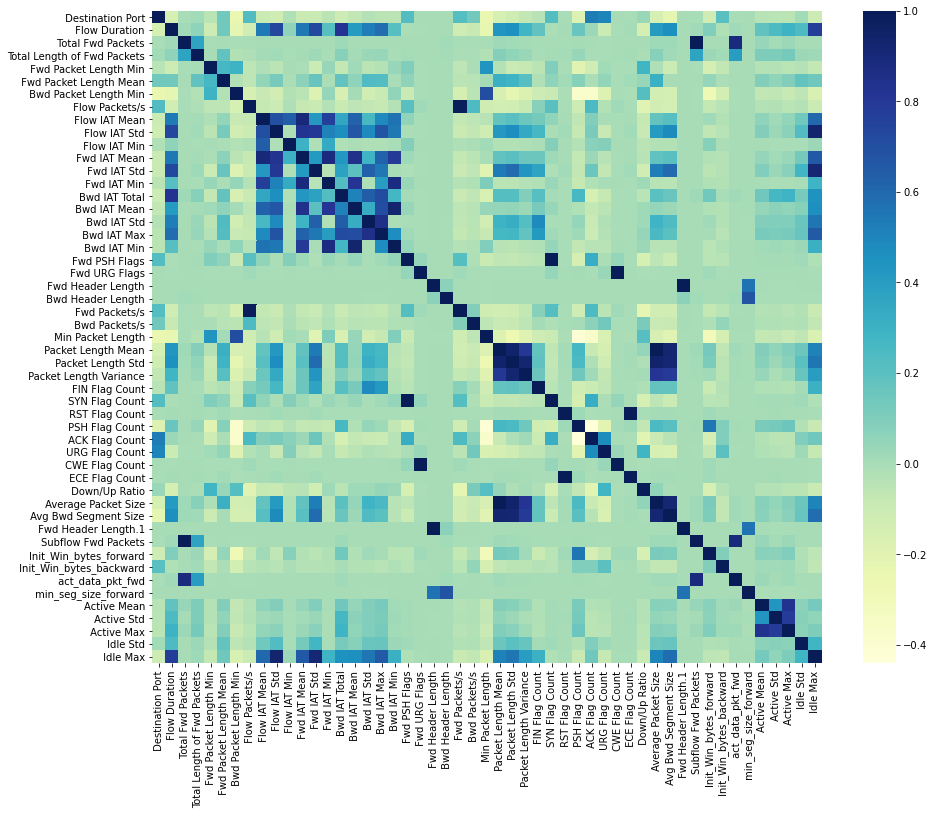

In [237]:
corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr, cmap="YlGnBu")

plt.show()

In [238]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
 Bwd Packet Length Min         0
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Std                  0
 Flow IAT Min                  0
 Fwd IAT Mean                  0
 Fwd IAT Std                   0
 Fwd IAT Min                   0
Bwd IAT Total                  0
 Bwd IAT Mean                  0
 Bwd IAT Std                   0
 Bwd IAT Max                   0
 Bwd IAT Min                   0
Fwd PSH Flags                  0
 Fwd URG Flags                 0
 Fwd Header Length             0
 Bwd Header Length             0
Fwd Packets/s                  0
 Bwd Packets/s                 0
 Min Packet Length             0
 Packet Length Mean            0
 Packet Length Std             0
 Packet Length Variance        0
FIN Flag Count                 0
 SYN Flag 

In [239]:
count = np.isinf(df[' Flow Packets/s']).values.sum()
print(count)

2867


In [240]:
df.drop(' Flow Packets/s',axis = 1, inplace = True)

In [241]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(df,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
#train.describe()
#test.describe()

# Packet Attack Distribution
train[' Label'].value_counts()
test[' Label'].value_counts()

BENIGN                      682092
DoS Hulk                     69066
PortScan                     47841
DDoS                         38346
DoS GoldenEye                 3041
FTP-Patator                   2359
SSH-Patator                   1786
DoS slowloris                 1764
DoS Slowhttptest              1649
Bot                            580
Web Attack Brute Force         465
Web Attack XSS                 203
Infiltration                    21
Web Attack Sql Injection         8
Heartbleed                       2
Name:  Label, dtype: int64

In [242]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [243]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 

# creating one hot encoder object 
onehotencoder = OneHotEncoder() 

trainDep = train[' Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test[' Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [244]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

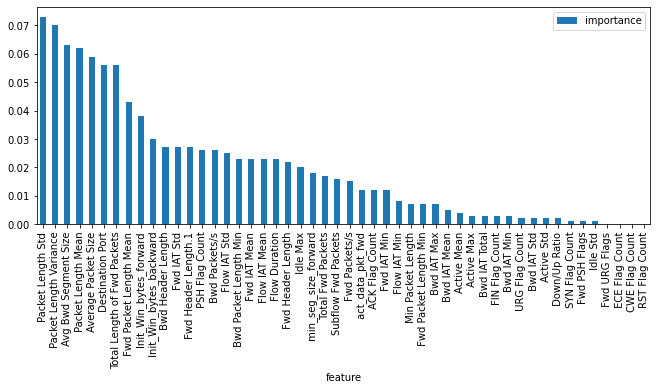

In [245]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train, Y_train);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [246]:
from sklearn import tree

In [247]:
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [248]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_train, DTC_Classifier.predict(X_train))

In [249]:
print("Training accuracy:", accuracy)

Training accuracy: 0.9997885686838058


In [250]:
accuracy1 = metrics.accuracy_score(Y_test, DTC_Classifier.predict(X_test))

In [251]:
print("Test Accuracy:", accuracy1)

Test Accuracy: 0.9984103127348402


In [252]:
pred_dt = DTC_Classifier.predict(test_X)

In [253]:
d1 = pd.DataFrame(pred_dt, columns = ['Predicted values'])
d1

,Predicted values
0,1
1,0
2,0
3,0
4,0
...,...
849218,0
849219,0
849220,0
849221,0


In [254]:
d2 = pd.DataFrame(pred_dt, columns = ['Actual Test Values'])
d2

,Actual Test Values
0,1
1,0
2,0
3,0
4,0
...,...
849218,0
849219,0
849220,0
849221,0


In [255]:
result = pd.concat([d1, d2], axis=1)

In [256]:
result

,Predicted values,Actual Test Values
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
849218,0,0
849219,0,0
849220,0,0
849221,0,0


In [257]:
result_plot = result.head(40)

<AxesSubplot:>

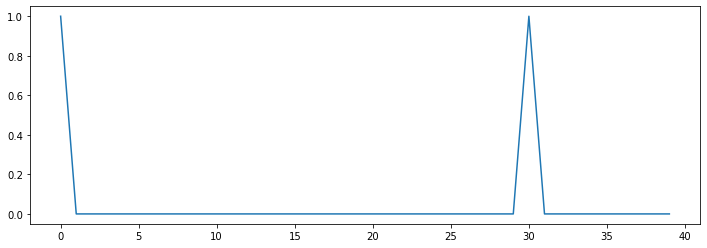

In [258]:
result_plot['Predicted values'].plot(figsize = (12,4))

<AxesSubplot:>

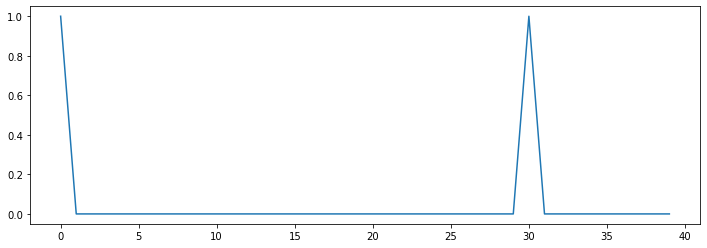

In [259]:
result_plot['Actual Test Values'].plot(figsize = (12,4))

In [260]:
from joblib import Parallel, delayed
import joblib
  
  
# Save the model as a pickle in a file
joblib.dump(DTC_Classifier, 'IITD-FSM-FinalIDS.pkl')

['IITD-FSM-FinalIDS.pkl']

In [261]:
import os
from flask import jsonify, Flask, request
from flask_restful import Api, Resource

In [262]:
if not os.path.isfile('IITD-FSM-FinalIDS.pkl'):
    train_model()

model = joblib.load("IITD-FSM-FinalIDS.pkl")

In [86]:
app = Flask(__name__)
api = Api(app)

C:\Users\HP\anaconda3\lib\ast.py:47: RuntimeWarning: coroutine 'Server.serve' was never awaited
  return compile(source, filename, mode, flags,


In [89]:
trainDep

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [205]:
X_test.to_csv("testing.csv")

[' Destination Port',
 ' Flow Duration',
 ' Total Fwd Packets',
 'Total Length of Fwd Packets',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Bwd Packet Length Min',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Min',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Fwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Down/Up Ratio',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Fwd Header Length.1',
 'Subflow Fwd Packets',
 'Init_Win_bytes_forward',
 ' Init_Win_bytes_backward',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 'Active Mean',
 ' Active St

In [60]:
test_X.to_csv('Test.csv')

In [62]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       'Total Length of Fwd Packets', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Bwd Packet Length Min', ' Flow IAT Mean',
       ' Flow IAT Std', ' Flow IAT Min', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Subflow Fwd Packets',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt

In [76]:
from fastapi import FastAPI
import uvicorn 
import pickle

app = FastAPI(debug = True)
@app.get('/')

def home():
    return {"prediction of class of attack"}

@app.get('/predict')
def predict( Destination_Port: float,  Flow_Duration:float,  Total_Fwd_Packets:float,
       Total_Length_of_Fwd_Packets:float,  Fwd_Packet_Length_Min:float,
        Fwd_Packet_Length_Mean:float,  Bwd_Packet_Length_Min:float,  Flow_IAT_Mean:float,
        Flow_IAT_Std:float,  Flow_IAT_Min:float,  Fwd_IAT_Mean:float,  Fwd_IAT_Std:float,
        Fwd_IAT_Min:float, Bwd_IAT_Total:float,  Bwd_IAT_Mean:float,  Bwd_IAT_Std:float,
        Bwd_IAT_Max:float,  Bwd_IAT_Min:float, Fwd_PSH_Flags:float,  Fwd_URG_Flags:float,
        Fwd_Header_Length:float,  Bwd_Header_Length:float, Fwd_Packetss:float,
        Bwd_Packets:float,  Min_Packet_Length:float,  Packet_Length_Mean:float,
        Packet_Length_Std:float,  Packet_Length_Variance:float, FIN_Flag_Count:float,
        SYN_Flag_Count:float,  RST_Flag_Count:float,  PSH_Flag_Count:float,
        ACK_Flag_Count:float,  URG_Flag_Count:float,  CWE_Flag_Count:float,
        ECE_Flag_Count:float,  DownUp_Ratio:float,  Average_Packet_Size:float,
        Avg_Bwd_Segment_Size:float,  Fwd_Header_Length1:float, Subflow_Fwd_Packets:float,
       Init_Win_bytes_forward:float,  Init_Win_bytes_backward:float,
        act_data_pkt_fwd:float,  min_seg_size_forward:float, Active_Mean:float,
        Active_Std:float,  Active_Max:float,  Idle_Std:float,  Idle_Max:float,  Label:float):
    
    model = pickle.load(open("C:\\Users\\HP\\Desktop\\iitdelhifsm\\Dataset\\cicids2017\\IITD-FSM-FinalIDS.pkl"))
    
    makeprediction = model.predict([[ Destination_Port,  Flow_Duration,  Total_Fwd_Packets,
       Total_Length_of_Fwd_Packets,  Fwd_Packet_Length_Min,
        Fwd_Packet_Length_Mean,  Bwd_Packet_Length_Min,  Flow_IAT_Mean,
        Flow_IAT_Std,  Flow_IAT_Min,  Fwd_IAT_Mean,  Fwd_IAT_Std,
        Fwd_IAT_Min, Bwd_IAT_Total,  Bwd_IAT_Mean,  Bwd_IAT_Std,
        Bwd_IAT_Max,  Bwd_IAT_Min, Fwd_PSH_Flags,  Fwd_URG_Flags,
        Fwd_Header_Length,  Bwd_Header_Length, Fwd_Packetss,
        Bwd_Packets,  Min_Packet_Length,  Packet_Length_Mean,
        Packet_Length_Std,  Packet_Length_Variance, FIN_Flag_Count,
        SYN_Flag_Count,  RST_Flag_Count,  PSH_Flag_Count,
        ACK_Flag_Count,  URG_Flag_Count,  CWE_Flag_Count,
        ECE_Flag_Count,  DownUp_Ratio,  Average_Packet_Size,
        Avg_Bwd_Segment_Size,  Fwd_Header_Length1, Subflow_Fwd_Packets,
       Init_Win_bytes_forward,  Init_Win_bytes_backward,
        act_data_pkt_fwd,  min_seg_size_forward, Active_Mean,
        Active_Std,  Active_Max,  Idle_Std,  Idle_Max,  Label]])
    
    output = makeprediction[0]
    
    return {"Attack is of type : {}",format.output}

